In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import random
from tabulate import tabulate

In [0]:
def create_sinusoidal(A, f, t, phase = 0):
  x = A * np.sin(2.0 * np.pi * f * t + phase)
  return x

In [0]:
def formatter(val,index):
  print(tabulate([val],headers=index, tablefmt='orgtbl'))

### Adder, Multiplier, Delay, Advanced

### Adder

In [0]:
def adder(signal1, signal2):
  M = len(signal1)
  N = len(signal2)
  L = max(M,N)
  x1 = np.pad(signal1, (0,L-M))
  x2 = np.pad(signal2, (0,L-N))
  x = x1 + x2
  print(tabulate([x1.tolist(),x2.tolist(),x.tolist()], headers=list(range(L)), tablefmt='orgtbl'))


In [48]:
adder([-1,4,5,7,6],[1,3,7])

|   0 |   1 |   2 |   3 |   4 |
|-----+-----+-----+-----+-----|
|  -1 |   4 |   5 |   7 |   6 |
|   1 |   3 |   7 |   0 |   0 |
|   0 |   7 |  12 |   7 |   6 |


### Multiplier

In [0]:
def multiplier(signal1, signal2):
  M = len(signal1)
  N = len(signal2)
  L = max(M,N)
  x1 = np.pad(signal1, (0,L-M))
  x2 = np.pad(signal2, (0,L-N))
  x = x1 * x2
  print(tabulate([x1.tolist(),x2.tolist(),x.tolist()], headers=list(range(L)), tablefmt='orgtbl'))

In [51]:
multiplier([-1,4,-3,2,5,7],[-2,-3,1])

|   0 |   1 |   2 |   3 |   4 |   5 |
|-----+-----+-----+-----+-----+-----|
|  -1 |   4 |  -3 |   2 |   5 |   7 |
|  -2 |  -3 |   1 |   0 |   0 |   0 |
|   2 | -12 |  -3 |   0 |   0 |   0 |


### Delay

In [0]:
def delay(k):
  sig = dict((idx, random.randint(0,10)) for idx in range(-5,6))
  sig_minus_k = dict((key+k,val) for key, val in sig.items())
  print('Original\n')
  formatter(sig.values(), sig.keys())
  print('\nDelay by {} units'.format(k))
  formatter(sig_minus_k.values(),sig_minus_k.keys())

In [46]:
delay(2)

Original

|   -5 |   -4 |   -3 |   -2 |   -1 |   0 |   1 |   2 |   3 |   4 |   5 |
|------+------+------+------+------+-----+-----+-----+-----+-----+-----|
|    2 |    9 |    9 |   10 |    6 |   8 |   7 |   5 |   5 |   6 |   5 |

Delay by 2 units
|   -3 |   -2 |   -1 |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|------+------+------+-----+-----+-----+-----+-----+-----+-----+-----|
|    2 |    9 |    9 |  10 |   6 |   8 |   7 |   5 |   5 |   6 |   5 |


### Advance

In [0]:
def advance(k):
  sig = dict((idx, random.randint(0,10)) for idx in range(-5,6))
  signal_plus_k = dict((key-k, val) for key,val in sig.items())
  print('Original\n')
  formatter(sig.values(), sig.keys())
  print('\nAdvace by {} units\n'.format(k))
  formatter(signal_plus_k.values(),signal_plus_k.keys())

In [38]:
advance(2)

Original

|   -5 |   -4 |   -3 |   -2 |   -1 |   0 |   1 |   2 |   3 |   4 |   5 |
|------+------+------+------+------+-----+-----+-----+-----+-----+-----|
|    4 |    1 |    6 |    1 |    6 |   3 |   8 |   3 |   7 |  10 |   9 |

Advace by 2 units

|   -7 |   -6 |   -5 |   -4 |   -3 |   -2 |   -1 |   0 |   1 |   2 |   3 |
|------+------+------+------+------+------+------+-----+-----+-----+-----|
|    4 |    1 |    6 |    1 |    6 |    3 |    8 |   3 |   7 |  10 |   9 |


### System Function

In [0]:
def system(x):
  y = np.zeros_like(x,dtype=float)
  for idx in range(1, len(x)):
    y[idx] = 0.25 * y[idx-1] + 1.25 * x[idx-1] + 0.25 * x[idx]
  return y

### Kernel Design

1. Moving Average Filter kernel: $[1/N,1/N,...,1/N]$
```
>>> np.convolve([3,1,4,2,3,5,6,1],[1/3.0,1/3.0,1/3.0],'same')
>>> [1.33333333,2.66666667,2.33333333,3.0,3.33333333,4.66666667,4.0,2.33333333]
```
2. Accumulator Filter kernel: $[1,1,...,1]$
```
>>> np.convolve([3,1,4,7,2],[1,1,1,1,1])[:6]
>>> [ 3,  4,  8, 15, 17, 14]
```


### Median Filter

In [0]:
def median_filter():
  t = np.linspace(0, 1.0, 200)
  x = create_sinusoidal(1.0, 3, t) + create_sinusoidal(0.25, 40, t)
  plt.figure(figsize=(8, 6))
  plt.plot(t,x, label="Original")
  plt.plot(t,medfilt(x,5),label="Filtered")
  plt.legend()
  plt.xlabel('time', fontsize = 15)
  plt.ylabel('x(t)', fontsize = 15)
  plt.title('Median Filter', fontsize = 15)
  plt.show()

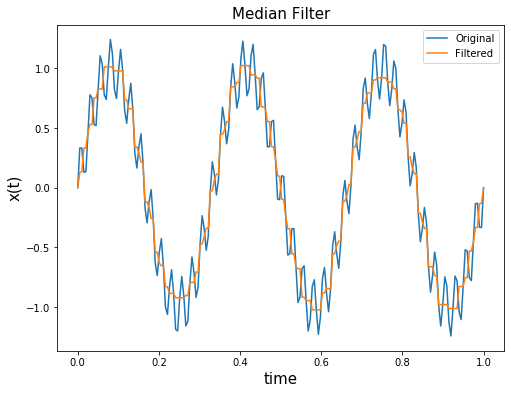

In [0]:
median_filter()

### Moving Average

In [0]:
def moving_avg_filter(window_size):
  t = np.linspace(0, 1.0, 200)
  x = create_sinusoidal(1.0, 3, t) + create_sinusoidal(0.25, 40, t)
  plt.figure(figsize=(8, 6))
  plt.plot(t,x, label="Original")
  N = window_size
  y = np.convolve(x,np.ones(N)/N, mode='same')
  plt.plot(t,y,label="Filtered")
  plt.legend()
  plt.xlabel('time', fontsize = 15)
  plt.ylabel('x(t)', fontsize = 15)
  plt.title('Moving Avg Filter', fontsize = 15)
  plt.show()

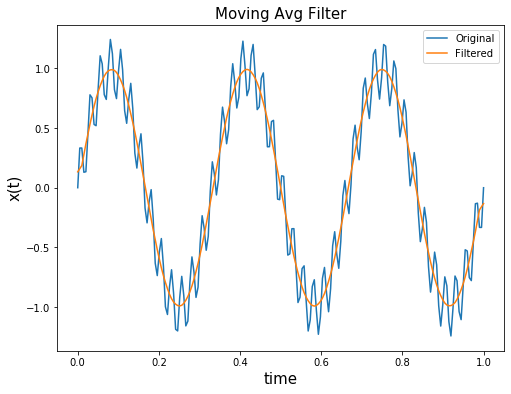

In [0]:
moving_avg_filter(window_size=5)

### Accmulator Filter

In [0]:
def accumulator_filter():
  t = np.linspace(0, 2.0, 100)
  x = create_sinusoidal(1.0, 3, t) + create_sinusoidal(0.25, 40, t)
  plt.figure(figsize=(8, 6))
  plt.plot(t,x, label="Original")
  N = 100
  y = np.convolve(x,np.ones(N))[:N]
  plt.plot(t,y,label="Filtered")
  plt.legend()
  plt.xlabel('time', fontsize = 15)
  plt.ylabel('x(t)', fontsize = 15)
  plt.title('Accumulator Filter', fontsize = 15)
  plt.show()

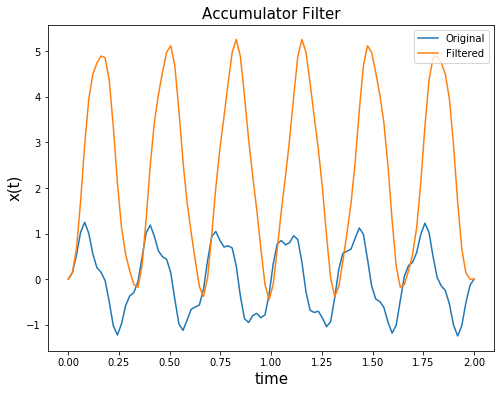

In [0]:
accumulator_filter()

### Noise Add & Removal using Moving Avg Filter

In [0]:
def noise_add_remove():
  t = np.linspace(0.0, 1.0, 100)
  x = create_sinusoidal(1,1,t)
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 11))
  fig.suptitle('Noise add and removal', fontsize=15)
  ax[0, 0].plot(t,x)
  ax[0, 0].set_title('Original Signal', fontsize=15)
  noise = np.array([random.uniform(0,0.3) for _ in range(100)])
  ax[0, 1].plot(t,noise)
  ax[0, 1].set_title('Noise Signal', fontsize = 15)
  distorted_signal = x + noise
  ax[1, 0].plot(t, distorted_signal)
  ax[1, 0].set_title('Distorted Signal', fontsize = 15)
  filtered_signal = np.convolve(distorted_signal, np.ones(5)/5, mode='same')
  filtered_signal = np.convolve(filtered_signal, np.ones(5)/5, mode='same')
  ax[1, 1].plot(t, filtered_signal)
  ax[1,1].set_title('Filtered Signal', fontsize = 15)
  plt.show()


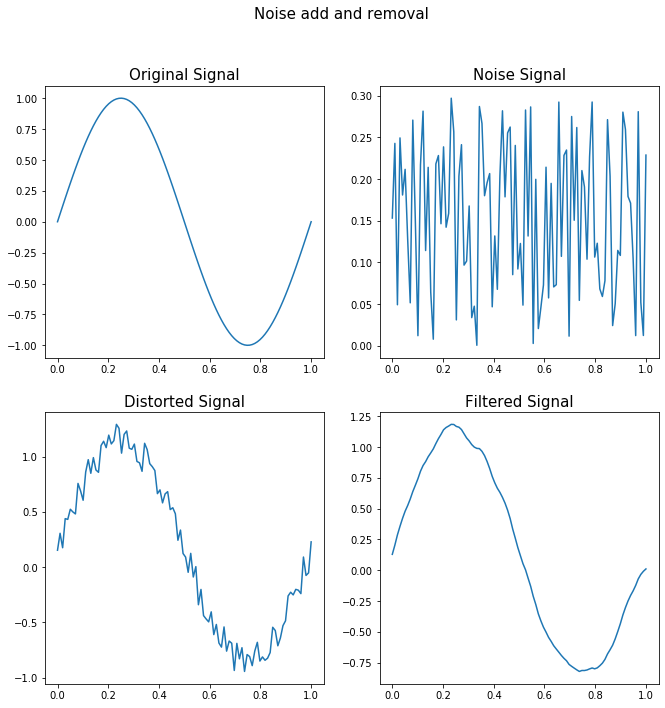

In [0]:
noise_add_remove()